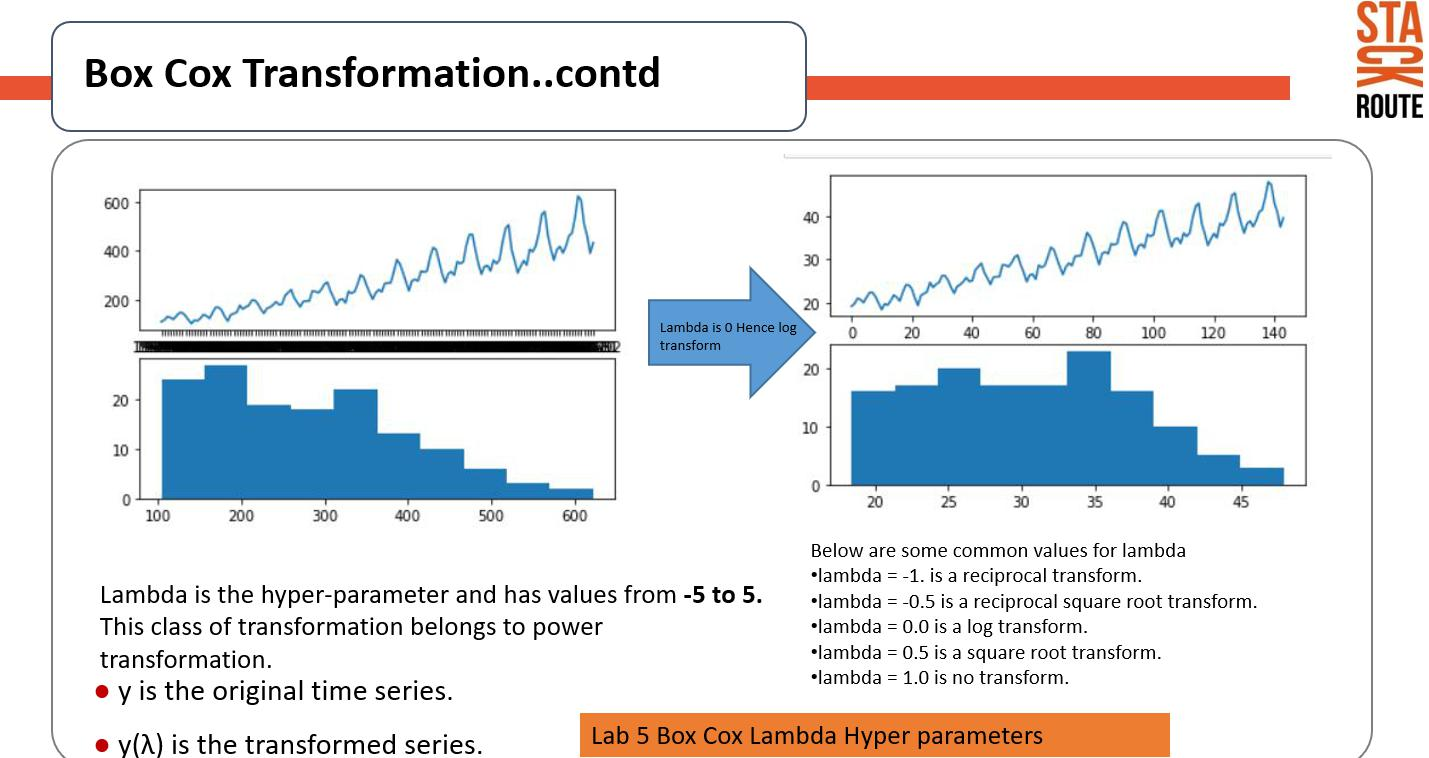

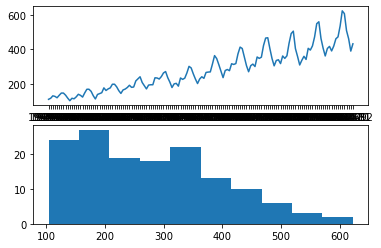

In [1]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

The dataset is non-stationary, meaning that the mean and the variance of the observations change over time. This makes it difficult to model by both classical statistical methods, like ARIMA, and more sophisticated machine learning methods, like neural networks.

This is caused by what appears to be both an increasing trend and a seasonality component.

In addition, the amount of change, or the variance, is increasing with time. This is clear when you look at the size of the seasonal component and notice that from one cycle to the next, the amplitude (from bottom to top of the cycle) is increasing.

## Log Transform
A class of more extreme trends are exponential, often graphed as a hockey stick.

Time series with an exponential distribution can be made linear by taking the logarithm of the values. This is called a log transform.



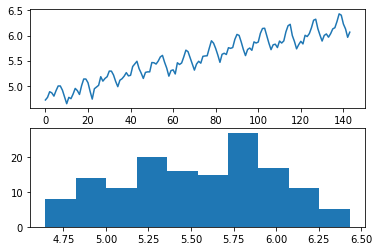

In [4]:
from pandas import read_csv
from pandas import DataFrame
from numpy import log
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

We can demonstrate this with another quick example.

The code below creates an exponential distribution by raising the numbers from 1 to 99 to the value e, which is the base of the natural logarithms or Euler’s number (2.718…).

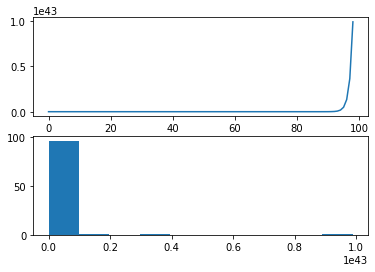

In [2]:
from matplotlib import pyplot
from math import exp
series = [exp(i) for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

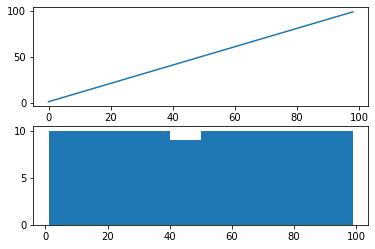

In [3]:
from matplotlib import pyplot
from math import exp
from numpy import log
series = [exp(i) for i in range(1,100)]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

In [7]:
## Using BoxCox function within Scipy. Note Lambda is 0 so it is a Log transform

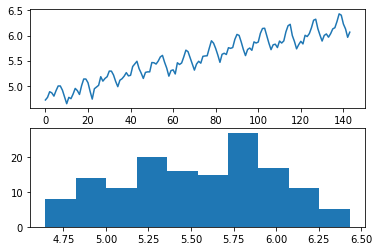

In [6]:
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

## Square root transform

In [8]:
# A time series that has a quadratic growth trend can be made linear by taking the square root.

## Using BoxCox Scipy function with lambda as 0.5

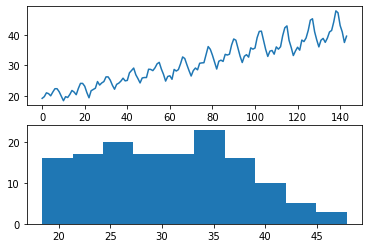

In [10]:
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', header=0, index_col=0)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.5) # Note lambda value is changed to 0.5
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

In [11]:
# we did the above sqare root transform for the heck of it to show how lambda hyper parameters work with the API. But let us see another
# good example of square root transformation

Consider a series of the numbers 1 to 99 squared. The line plot of this series will show a quadratic growth trend and a histogram of the values will show an exponential distribution with a long trail.

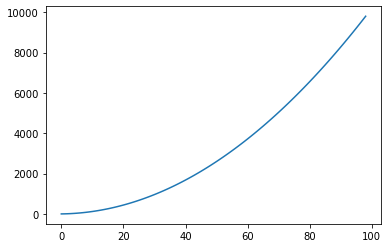

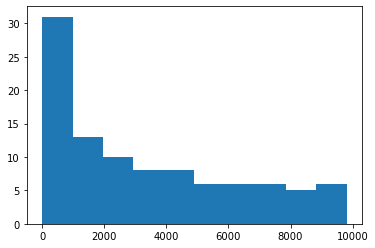

In [12]:
from matplotlib import pyplot
series = [i**2 for i in range(1,100)]
# line plot
pyplot.plot(series)
pyplot.show()
# histogram
pyplot.hist(series)
pyplot.show()

If you see a structure like this in your own time series, you may have a quadratic growth trend. This can be removed or made linear by taking the inverse operation of the squaring procedure, which is the square root.

Because the example is perfectly quadratic, we would expect the line plot of the transformed data to show a straight line. Because the source of the squared series is linear, we would expect the histogram to show a uniform distribution.

The example below performs a sqrt() transform on the time series and plots the result.

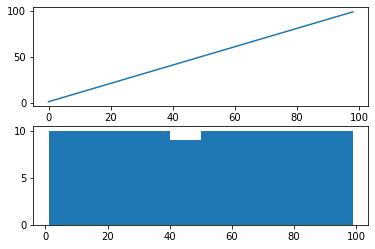

In [13]:
from matplotlib import pyplot
from numpy import sqrt
series = [i**2 for i in range(1,100)]
# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

Blog reference : https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/